In [ ]:
# import numpy, matplotlib, pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

# import dataset "Saving Social_Network_Ads"
from google.colab import files
uploaded = files.upload()

In [ ]:
# read the dataset and make a dataframe and make x and y
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
# from sklearn import train test split and split dataset into train and test samples
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)


In [ ]:
# from sklearn import StandardScaler and scale x_train and x_test
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

In [ ]:
# transpose all x_train, x_test, y_train and y_test
x_train=x_train.transpose()
x_test=x_test.transpose()
y_train=y_train.transpose()
y_test=y_test.transpose()

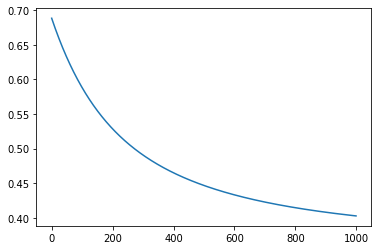

In [ ]:
# intialize the weights and bias, length of training samples, number of iteration
# implement gradient descent algorithm to update the weights
# plot cost function with number of iteration
alpha = 0.01
num_itr=1000
m=x_train.shape[1]
cost=[]
w=np.full((x_train.shape[0],1),0.01)
b=0.0
for i in range(num_itr):
    z=np.dot(w.T,x_train) + b
    a=1/(1+np.exp(-z))
    loss = -y_train*np.log(a) - (1-y_train)*np.log(1-a)
    cost.append((np.sum(loss))/m)
    gradient_weight=(np.dot(x_train,((a-y_train).T)))/m
    gradient_bias = np.sum(a-y_train)/m
    b=b-alpha*gradient_bias
    w=w-alpha*gradient_weight
    
plt.plot(range(num_itr),cost)
    

In [ ]:
# # show final undated weights as a dataframe
# w=list(w)
pd.DataFrame(w,columns=["Weights"])


,Weights
0,1.239458
1,0.653195


In [ ]:
# predict output corresponding to x_test using final updated weights and bias
# plt.style.use('seaborn')
# y_train=y_train.reshape((-1,))
# plt.scatter(x_train[:,0],x_train[:,1],c=y_train)


z=np.dot(w.T,x_test) + b
#a=1/(1+np.exp(-z))

m1=x_test.shape[1]
# print(x_test.shape[1])
# print(x_test.shape[0])
# print(x_test.shape)

y_pred=np.zeros(m1,dtype="int")

for i in range(m1):
    if z[0,i]<=0.5:
        y_pred[i]=0
    else:
        y_pred[i]=1
        
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 1 0 1 0]


In [ ]:
# from sklearn.metrics import confusion_matrix and accuracy_score and calculate confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: {}".format(cm))
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred)
ls=[]
ls.append(cm)
ls.append(a)
pd.DataFrame(ls, columns=['ls'])

Confusion Matrix: [[76  3]
 [17 24]]


/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,ls
0,"[[76, 3], [17, 24]]"
1,0.833333
